# Central Limit Theorem, Confidence Intervals, and Hypotheses

## Package Imports

Run the cell provided below to import packages needed for this assignment.

You may also need to read in additional packages below.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

<hr>

## <u>Case Study 1</u>: Preparing to Eat

We have a random sample of time spent preparing food and drink (in minutes) by American adults in the last 24 hours contained in the food_prep.csv file.  Using this random sample, we will construct and understand a confidence interval in this Case Study.

## 1. Read in the data 

In [2]:
food = pd.read_csv('food_prep.csv')
print(food.shape[0])
food.head()

400


,Unnamed: 0,food_prep
0,1,15
1,2,2
2,3,60
3,4,45
4,5,0


## 2. Construct a Confidence Interval 

We will construct an 88% confidence interval for the average time spent preparing food or drink in the last 24 hours.

**a)**  Define the parameter of interest for our confidence interval.

$\mu=$ average time spent preparing food and drink by ALL adults living in America in the last 24 hours. 

**b)** Construct an 88% confidence interval for the average time spent preparing food or drink in the last 24 hours.

In [3]:
sample_mean = food['food_prep'].mean()
sample_std = food['food_prep'].std()
n = food.shape[0]

print('Sample Mean: ', sample_mean)
print('Sample Standard Deviation: ', sample_std)
print('Sample Size: ', n)

Sample Mean:  31.42
Sample Standard Deviation:  44.583324034384084
Sample Size:  400


In [4]:
alpha = 0.12
critical_value=norm.ppf(1-alpha/2)

print('Critical Value: ',critical_value)

Critical Value:  1.5547735945968535


In [5]:
lower_bound=sample_mean-critical_value*(sample_std/np.sqrt(n))
upper_bound=sample_mean+critical_value*(sample_std/np.sqrt(n))

print(lower_bound,',',upper_bound)

27.95415125159922 , 34.88584874840078


**c)** Put your confidence interval into words.  That is, interpret your confidence interval.

The population mean time (parameter) is likely to be between 27.95 minutes and 34.89 minutes.

**d)** Interpret the confidence level for your interval calculation.

I am 88% confident that the population mean time (parameter) is in the confidence interval that I calculated.

**e)** State & check the conditions (assumptions) for creating your confidence interval.

1. Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S, the observations are independent. 

2. Because our sample size is $n=400>30$,the condition is met.

**f)** What distribution did you use to find your multiplier above?  Explain why you used this distribution.

Normal distribution. Either when the sample size is over 30, or the population has a normal distribution, we can use normal distribution to find a multiplier. In my case, the sample size was over 30. 

<hr>

## <u>Case Study 2</u>: Colleges and Universities

We will use a random sample of post-secondary education facilities (colleges & universities) from the United States, including Puerto Rico & other US territories.  The **colleges.csv** file contains a random sample of 135 post-secondary education facilities from the US.  This data comes from: https://www.kaggle.com/yamqwe/colleges-and-universitiese

We will focus on two variables in particular:

- the total dorm capacity of the college or university (`DORM_CAP`)
- the total number of students enrolled (`TOT_ENROLL`)

## 3. Read and prepare the data 
You should read in the data from the **colleges.csv** file, perform any cleaning that needs to take place, and create the following variable:

- the variable `dorms`, a logical (Boolean) variable that indicates if the college or university offers dorms (dorm capacity is larger than 0)

**Hint:** For the data cleaning, we only care about the 2 variables defined above.  Consider reasonable values for the `TOT_ENROLL` variable in particular, and remove any colleges or universities that do not have reasonable values recorded.

In [2]:
colleges = pd.read_csv('colleges.csv')
colleges['TOT_ENROLL'].unique()

array([ 1666,  4216,  4391,  1508,     0,  3407,    77,    95,  2874,
         169, 12260,  3482,    67,   257,  1968,  1658, 23625,   177,
          53,   783,   235,  7406,   294,  2254,   775,   507,  3713,
         329,   312,    80,  1576,   695,    71, 40695,    62,   660,
        3118,  2016,   498,    86,  8368,  2741,   175,   276,   262,
         155,  9573,  4702,   142,   102, 18176,   296,   253,  8775,
         408,   918,   153, 28127,   795,  1153,   244,   371,   186,
        1894,  1107, 10979,   290,  2158,  3693, 13414,  7026,   820,
         106,   205,    22, 21557, 12228,   100,   203,   394,   644,
         640,  3359,   267,   629,  2632,  4149,  1754,  1370,    15,
        1026,   134,    25,   178,    16,    11, 16650,   128,   327,
         546,  1378,   190,   319,  5867,  1116,    96,   464,   605,
         400,   200,   453,  4509,  1148,  8140,   245,    30,   447,
        1973, 11431,    87,    12,  3332,  1400,   529,   981, 10073],
      dtype=int64)

It is unreasonable that the total number of students enrolled is 0.

In [3]:
colleges = colleges [colleges['TOT_ENROLL']!= 0]
colleges = colleges.reset_index()

In [6]:
n_sample = colleges.shape[0]
n_sample 

128

In [4]:
def boolean(x):
    if x > 0:
        y = True
    else:
        y = False
    return(y)

colleges['dorms'] = colleges.apply(lambda row : boolean(row['DORM_CAP']), axis = 1)

In [7]:
p_hat = colleges['dorms'].sum() / n_sample
p_hat

0.3125

## 4. Do Colleges Offer Dorms?

Based on our remaining random sample of colleges and universities, we will estimate the proportion of colleges and universities that offer dorms as housing with 75% confidence. 

**a)** Define our parameter of interest in the context of the problem.

p=the population proportion of all colleges and universities in the U.S. that offer dorms as housing. 

**b)** State & check the conditions before generating your confidence interval.

The Central Limit Theorem Conditions (for Sample Proportions) below are met by this sample.

1. The observations are independent because the sample is collected via random sampling and $n<10\%$ of the population size (ALL colleges and universities in U.S. )

2.  $np\geq 10$   and   $n(1-p)\geq 10$.
    - Because we don't know $p$, we plug in $p_0=0.3125$ in for $p$ in the conditions above.
    - $np_0 = 128\cdot 0.3125\geq 10$
    - $n(1-p_0)=128\cdot(1-0.3125)\geq 10$.

**c)** Calculate the 75% confidence interval that estimates the proportion of colleges and universities that offer dorms as housing.

In [8]:
alpha_2=0.25
critical_value_2=norm.ppf(1-alpha_2/2)
print('Critical Value:',critical_value_2)

Critical Value: 1.1503493803760079


In [10]:
lower_bound_2=p_hat - critical_value_2*np.sqrt(p_hat*(1-p_hat)/n_sample)
upper_bound_2=p_hat + critical_value_2*np.sqrt(p_hat*(1-p_hat)/n_sample)

print(lower_bound_2,',',upper_bound_2)

0.26537122622556997 , 0.35962877377443003


**d)** Interpret your confidence interval.  That is, put your interval into words.

I am 75% confident that the true population proportion of all colleges & universities that offer dorms as a housing option for students is contained in the interval (0.2654, 0.3596). 

**e)** Based on your confidence interval, respond to the following statement.

Is it reasonable to say that the proportion of all colleges and universities that offer dorms as housing options for students is different from one third (1/3)?

Be sure to explain your answer, and write out the corresponding hypotheses that we could be testing.

1. The value of 0.33, representing 1/3, is contained in the interval, so it's a reasonable value for our parameter of interest. 

2. Set up hypothesis

$H_0: p=1/3$

$H_A: p\neq1/3$

I would fail to reject the null hypothesis at a significance level of alpha = 0.25.

**f)** Suppose that we gather a second random sample of 128 colleges, and record the proportion of colleges and univerisities that offer dorms as housing for this sample.  We generate a second confidence interval for our proportion from this sample, and find that we have a different confidence interval calculated than from part **c** above.  Based on the fact that our confidence interval calculation is different, did we do something wrong during the confidence interval generation?  Explain.

No. We had to calculate confidence interval only with a value of p_hat (proportion from the sample) because we don't know the proportion from a population. 

Therefore, there could be a difference of sample proportion between randomly sampled colleges which means our confidence interval could be different between samples. 

** Solution **

We did not necessarily do something incorrect. We have a sample of the same size (128). Our z* multiplier
should be the same. However, since we have a different sample, it would be reasonable to have a different
sample mean and sample standard deviation that is used in the confidence interval equation: p_hat +/- z*(sqrt(p_hat*(1-phat)/n))

I would be surprised to have extremely different statistics across the different samples, but I would also be surprised to have the exact same statistics from two different samples. 

**g)** Now suppose that we gather 200 random samples of 128 colleges, and record the proportion of colleges and universities that offer dorms as housing for each sample.  We use our sample data for each sample to generate a new 75% confidence interval.  How many of the 200 random samples do you expect to miss the true proportion of colleges and universities that offer dorms as housing for each sample?

The confidence level interpretation explains that I would expect 75% of the 200 confidence intervals to
contain/cover the true proportion.
That means that I would expect 25% of the intervals to miss the parameter, so 25% of 200, or 50 intervals.

## 5. Average enrollment?

The University of Illinois is a large university, with a total enrollment of approximately 44,000.  There are many smaller colleges in the state, including Parkland College with a total enrollment of 9,715.  

We know that there are many more smaller colleges than large universities, so we'd like to test if the average college enrollment is smaller than the enrollment of Parkland College.  

We'd like to perform a hypothesis test using a 10% significance level based on our sample of colleges and universities.

**a)** Write out your hypotheses.  Be sure to use appropriate notation and to define the parameter of interest.

Our parameter of interest \mu is the population mean enrollment for the population of all colleges and universities. 

We would like to test if the population mean enrollment of all colleges and universities in the United States is less than the enrollment of Parkland College (9,715).

Set up hypothesis

$H_0: \mu = 9,715$

$H_A: \mu < 9,715$

Because we are only interested in one side, we should perform a one-tailed test.

**b)** While we could follow the standard hypothesis testing procedure, we will instead make use of our simulation procedures that we have developed so far this semester.

While we only have our one sample available, we will use it as a stand in for the population.  From our sample, gather a random sample with replacement of the same size as our original sample data.  We will then repeat this process to generate many random samples.  For each of our random samples, calculate and record our statistic of interest.  We will repeat this process 5000 times, and use the 5000 observations of our statistic of interest as a sampling distribution.

Since we are using sample data to generate this sampling distribution, we can refer to our estimated sampling distribution as a **bootstrapped** distribution.

In [11]:
df_enrollment=colleges['TOT_ENROLL'].dropna()
df_enrollment

0       1666
1       4216
2       4391
3       1508
4       3407
       ...  
123     3332
124     1400
125      529
126      981
127    10073
Name: TOT_ENROLL, Length: 128, dtype: int64

In [12]:
df_enrollment.mean()

2975.0859375

In [14]:
bootstrap = []
for i in range(5000):
    bootstrap.append((colleges['TOT_ENROLL'].sample(128, replace = True)).mean())

bootstrap = pd.DataFrame({'xbar': bootstrap})

**c)** Generate a histogram of the **bootstrapped** distribution.

<AxesSubplot:>

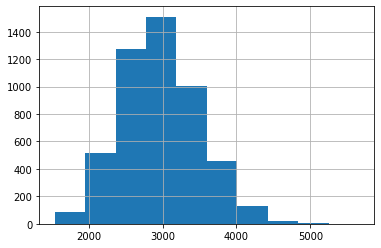

In [15]:
# bootstrapped distribution
bootstrap['xbar'].hist()

**d)** Find the middle 80% of the bootstrapped distribution.

We can use this as an approximation for an 80% confidence interval.

*Hint*: Recall that we previously found percentiles for a set of data in Case Study 3 (about Quantitative Variables) when we were finding the IQR.  We can make adjustments to the arguments for the code to help us find the middle 80% of our bootstrapped distribution.

In [17]:
Q_10 = bootstrap['xbar'].quantile(0.1)
Q_90 = bootstrap['xbar'].quantile(0.9)

print ('( ', Q_10,',',Q_90, ' )' )

(  2311.55234375 , 3670.7968750000005  )


The estimated 80% confidence interval based on the bootstrapping procedure is (2311.55, 3670.80).
The middle 80% correspond to 20% in the tails and 10% in each tail. This means that we are looking for the 10th and 90th percentiles, which we can find from our simulated bootstrapped distribution. 


**e)** Based on the interval from part **d**, assess the theories in the hypotheses in part **a**.  Which is more reasonable?  Explain.

Based on the interval from pard d, 9,715 is not a reasonable value for the total enrollment of a college. In fact, the entire confidence interval is less than that value, which corresponds to the alternative hypothesis. Therefore, I would reject my null hypothesis and say that my alternative is more reasonable. 